In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("consumo_material_clean.xlsx")
df.head()

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO
0,E99808,01/01/23,1595724/23,178567.1,60,10,62.590000,375.540000,Compra menor,1-2-60,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3
1,B41691,01/02/16,72714/16,400403,40,10,102.803729,411.214916,Compra menor,0-10-1,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...
2,E64543,01/02/16,71961/16,403770,20,5,12.100000,48.400000,Compra menor,0-4-111,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18
3,E65007,01/02/16,72773/16,20415,100,50,215.325000,430.650000,Concurso,0-10-1,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11
4,E64911,01/02/17,86159/17,20701,300,300,792.000000,792.000000,Concurso,0-6-1,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6


# Organització de les dades
### UNIDADESCONSUMOCONTENIDAS para cada CODIGO

In [3]:
aux = df[["CODIGO", "UNIDADESCONSUMOCONTENIDAS"]]
sizes_per_code = aux.groupby('CODIGO')['UNIDADESCONSUMOCONTENIDAS'].unique()
sizes_per_code

CODIGO
B40558             [1, 20]
B41691                [10]
C26183               [350]
C56207               [350]
E64488            [30, 50]
E64543            [5, 100]
E64544                [10]
E64663            [100, 5]
E64750      [50, 200, 500]
E64751    [400, 100, 2000]
E64761             [5, 16]
E64764          [300, 640]
E64765     [300, 480, 560]
E64898               [350]
E64911               [300]
E64932         [40, 10, 5]
E64940                [70]
E64946            [10, 60]
E64983           [10, 160]
E65007                [50]
E65056                 [3]
E65159              [1000]
E65201                [10]
E65485            [5, 240]
E65486                [10]
E65509            [10, 80]
E65894           [10, 140]
E66071           [10, 180]
E67462         [10, 5, 70]
E67835               [100]
E69682                [10]
E70130             [50, 5]
E73753            [10, 50]
E78950                [12]
E85758           [240, 10]
E85769           [10, 240]
E99807               

# Afegir columnes de mes, any, id_hospital i total_unitats

In [4]:
df['month'] = df['FECHAPEDIDO'].str[3:5]
df['year'] = df['FECHAPEDIDO'].str[-2:]
df['id_hospital'] = df['ORIGEN'].apply(lambda x: x.split('-')[1] if x.split('-')[0] == '0' else '20')
df['id_department'] = df['ORIGEN'].apply(lambda x: x.split('-')[2] if '-' in x else '')
df['total_units'] = df['CANTIDADCOMPRA'] * df['UNIDADESCONSUMOCONTENIDAS']
df.head()

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO,month,year,id_hospital,id_department,total_units
0,E99808,01/01/23,1595724/23,178567.1,60,10,62.590000,375.540000,Compra menor,1-2-60,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3,01,23,20,60,600
1,B41691,01/02/16,72714/16,400403,40,10,102.803729,411.214916,Compra menor,0-10-1,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...,02,16,10,1,400
2,E64543,01/02/16,71961/16,403770,20,5,12.100000,48.400000,Compra menor,0-4-111,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18,02,16,4,111,100
3,E65007,01/02/16,72773/16,20415,100,50,215.325000,430.650000,Concurso,0-10-1,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11,02,16,10,1,5000
4,E64911,01/02/17,86159/17,20701,300,300,792.000000,792.000000,Concurso,0-6-1,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6,02,17,6,1,90000


In [5]:
years = df['FECHAPEDIDO'].str[-2:].unique()
print(years)

['23' '16' '17' '18' '19' '21' '22' '15' '20']


In [6]:
letters = ['B', 'C', 'E', 'F']

df_by_letter = dict()

for l in letters:
    df_by_letter[l] = df.loc[df['CODIGO'].str.startswith(l)]

In [7]:
codis = df['CODIGO'].unique()
print(len(codis))

48


# Correlació

Product pairs with correlation > 0.75:


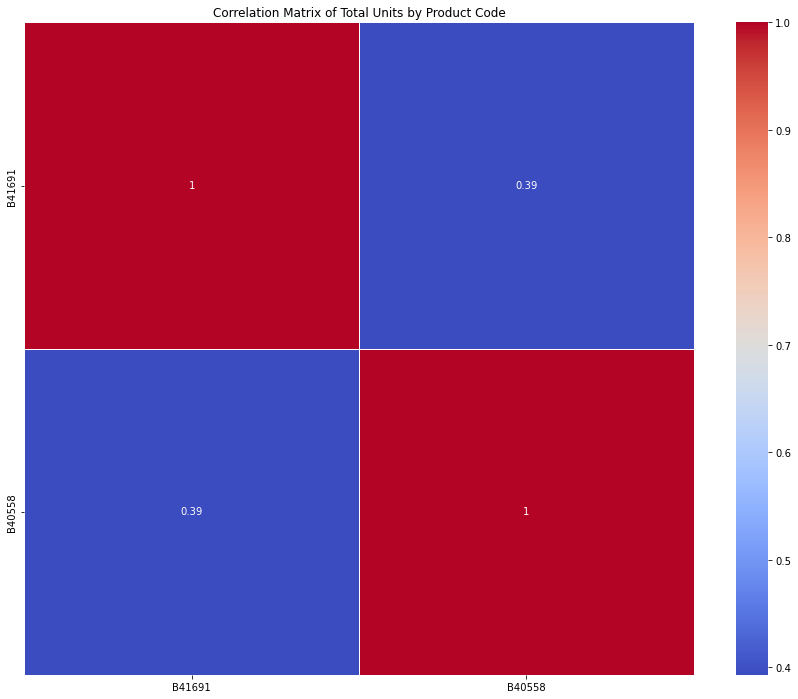

Product pairs with correlation > 0.75:


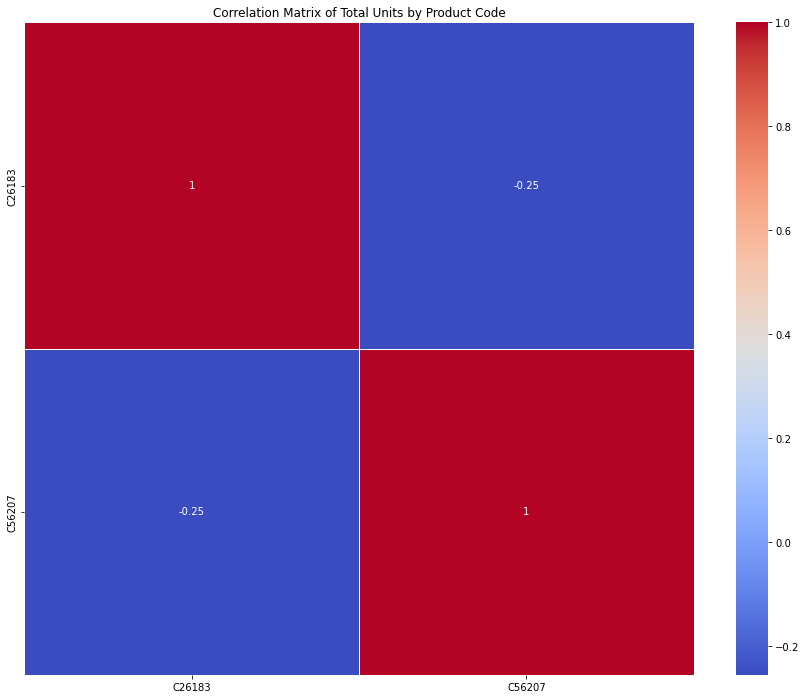

Product pairs with correlation > 0.75:
E64932 and E99808: 0.7766002681990307
E64932 and E99807: 0.7568137659418644
E78950 and E99807: 0.8264117890642219
E99807 and E99808: 0.7671740670139494
E64544 and E99808: 0.7621602469115469
E64544 and E78950: 0.7828274254299133
E64544 and E99807: 0.8641419112350083
E85758 and E99808: 0.7517094876257284


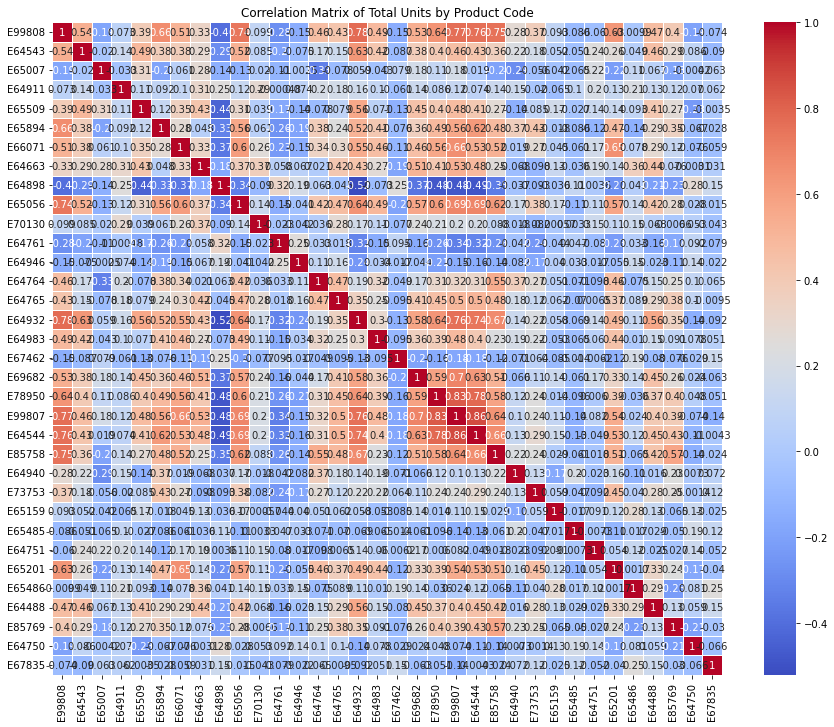

Product pairs with correlation > 0.75:
F46843 and F46846: 0.7892747781956542


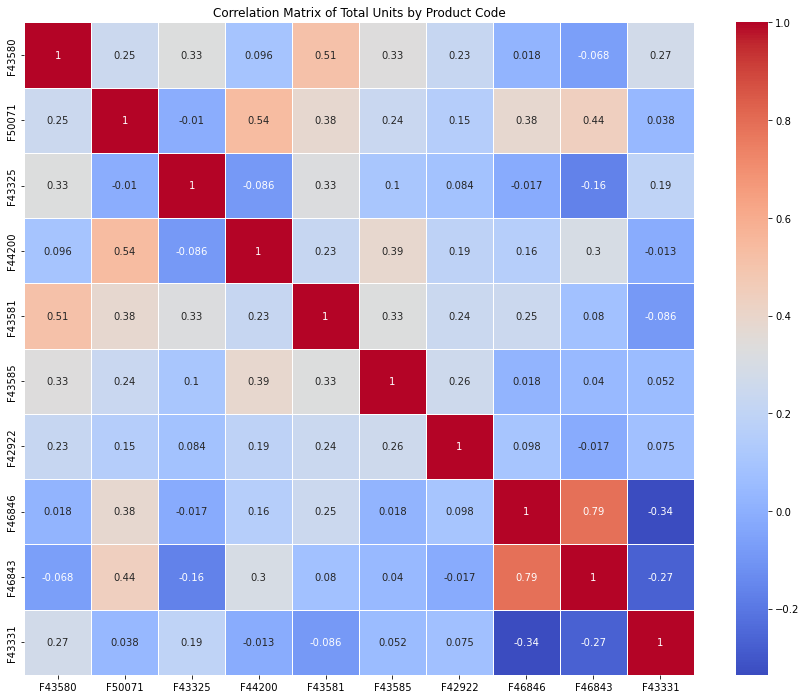

In [8]:
# Dins cada categoria

for letter, dataset in df_by_letter.items():
    # Obtinc la suma de cada producte
    aux = dataset.copy()
    aux = aux.groupby(['CODIGO', 'month', 'year'])['total_units'].sum().reset_index()
    
    # Create a pivot table
    pivot_table = dataset.pivot_table(index=['CODIGO'], columns=['year','month'], values='total_units', aggfunc='sum', fill_value=0)

    #print(pivot_table)
    
    # Extract vectors for each product code
    vectors = {}
    for code in dataset['CODIGO'].unique():
        code_data = pivot_table.loc[code]
        vectors[code] = code_data.values.flatten()
        
    #print(vectors)

    # Compute the correlation matrix
    correlation_matrix = pd.DataFrame(index=vectors.keys(), columns=vectors.keys())
    for code1 in vectors.keys():
        for code2 in vectors.keys():
            correlation_matrix.at[code1, code2] = pd.Series(vectors[code1]).corr(pd.Series(vectors[code2]))
            
            
    # Find pairs with correlation over 0.75
    high_correlation_pairs = []
    for code1 in vectors.keys():
        for code2 in vectors.keys():
            if code1 < code2 and correlation_matrix.at[code1, code2] > 0.75:
                high_correlation_pairs.append((code1, code2, correlation_matrix.at[code1, code2]))

    # Print the high correlation pairs
    print("Product pairs with correlation > 0.75:")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]}")
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(15, 12))
    sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Matrix of Total Units by Product Code')
    plt.show()


Product pairs with correlation > 0.75:
B and F: 0.7723073707951934


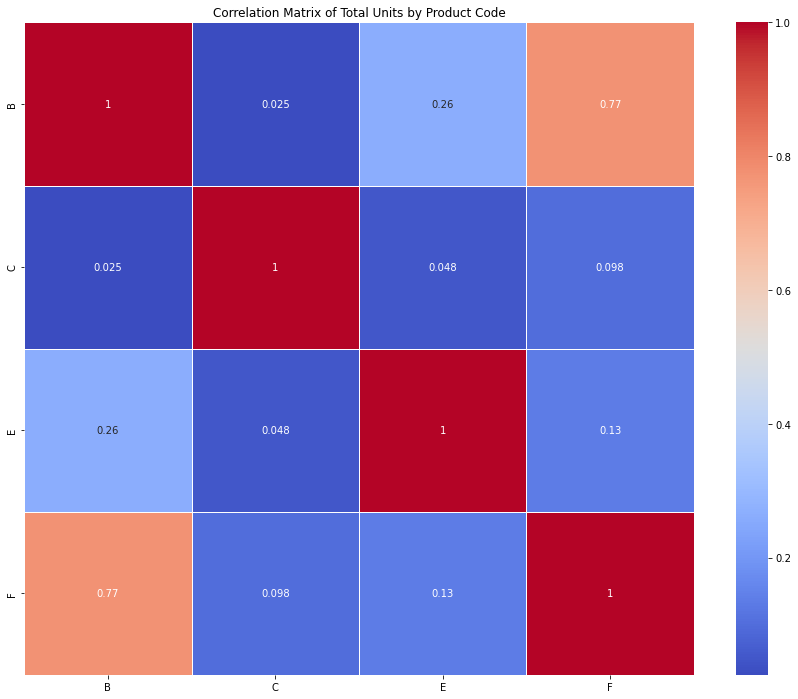

In [9]:
# Entre categories

# Obtinc la suma de cada producte
dataset = df.copy()
dataset['CODIGO'] = dataset['CODIGO'].str[0]
dataset = dataset.groupby(['CODIGO', 'month', 'year'])['total_units'].sum().reset_index()

# Create a pivot table
pivot_table = dataset.pivot_table(index=['CODIGO'], columns=['year','month'], values='total_units', aggfunc='sum', fill_value=0)

#print(pivot_table)

# Extract vectors for each product code
vectors = {}
for code in dataset['CODIGO'].unique():
    code_data = pivot_table.loc[code]
    vectors[code] = code_data.values.flatten()

#print(vectors)

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(index=vectors.keys(), columns=vectors.keys())
for code1 in vectors.keys():
    for code2 in vectors.keys():
        correlation_matrix.at[code1, code2] = pd.Series(vectors[code1]).corr(pd.Series(vectors[code2]))
        
# Find pairs with correlation over 0.75
high_correlation_pairs = []
for code1 in vectors.keys():
    for code2 in vectors.keys():
        if code1 < code2 and correlation_matrix.at[code1, code2] > 0.75:
            high_correlation_pairs.append((code1, code2, correlation_matrix.at[code1, code2]))

# Print the high correlation pairs
print("Product pairs with correlation > 0.75:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Total Units by Product Code')
plt.show()


Product pairs with correlation > 0.75:
B41691 and F43580: 0.7576560556840909
F46843 and F46846: 0.8135671186014094


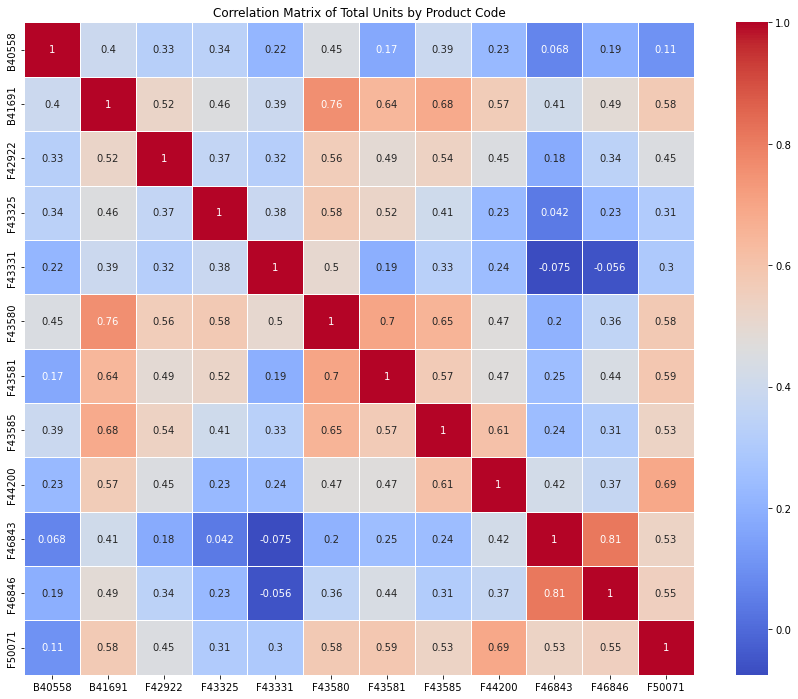

In [10]:
# B i F conjuntament

# Dins cada categoria

# Obtinc la suma de cada producte
dataset = pd.concat([df_by_letter['B'], df_by_letter['F']], ignore_index=True)
dataset = dataset.groupby(['CODIGO', 'month', 'year'])['total_units'].sum().reset_index()

# Create a pivot table
pivot_table = dataset.pivot_table(index=['CODIGO'], columns=['year','month'], values='total_units', aggfunc='sum', fill_value=0)

#print(pivot_table)

# Extract vectors for each product code
vectors = {}
for code in dataset['CODIGO'].unique():
    code_data = pivot_table.loc[code]
    vectors[code] = code_data.values.flatten()

#print(vectors)

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(index=vectors.keys(), columns=vectors.keys())
for code1 in vectors.keys():
    for code2 in vectors.keys():
        correlation_matrix.at[code1, code2] = pd.Series(vectors[code1]).corr(pd.Series(vectors[code2]))
        
# Find pairs with correlation over 0.75
high_correlation_pairs = []
for code1 in vectors.keys():
    for code2 in vectors.keys():
        if code1 < code2 and correlation_matrix.at[code1, code2] > 0.75:
            high_correlation_pairs.append((code1, code2, correlation_matrix.at[code1, code2]))

# Print the high correlation pairs
print("Product pairs with correlation > 0.75:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Total Units by Product Code')
plt.show()

In [11]:
# TOTS CONTRA TOTS
# Entre categories

# Obtinc la suma de cada producte
dataset = df.copy()
dataset = dataset.groupby(['CODIGO', 'month', 'year'])['total_units'].sum().reset_index()

# Create a pivot table
pivot_table = dataset.pivot_table(index=['CODIGO'], columns=['year','month'], values='total_units', aggfunc='sum', fill_value=0)

#print(pivot_table)

# Extract vectors for each product code
vectors = {}
for code in dataset['CODIGO'].unique():
    code_data = pivot_table.loc[code]
    vectors[code] = code_data.values.flatten()

#print(vectors)

# Compute the correlation matrix
correlation_matrix = pd.DataFrame(index=vectors.keys(), columns=vectors.keys())
for code1 in vectors.keys():
    for code2 in vectors.keys():
        correlation_matrix.at[code1, code2] = pd.Series(vectors[code1]).corr(pd.Series(vectors[code2]))
        
# Find pairs with correlation over 0.75
high_correlation_pairs = []
for code1 in vectors.keys():
    for code2 in vectors.keys():
        if code1 < code2 and correlation_matrix.at[code1, code2] > 0.75:
            high_correlation_pairs.append((code1, code2, correlation_matrix.at[code1, code2]))

# Print the high correlation pairs
print("Product pairs with correlation > 0.75:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Product pairs with correlation > 0.75:
B41691 and E64544: 0.7986285827591559
B41691 and E78950: 0.8409133356202014
B41691 and E99807: 0.8780590976702829
B41691 and F43580: 0.7576560556840909
E64544 and E78950: 0.7828274254299133
E64544 and E99807: 0.8641419112350083
E64544 and E99808: 0.7621602469115469
E64932 and E99807: 0.7568137659418644
E64932 and E99808: 0.7766002681990307
E78950 and E99807: 0.8264117890642219
E78950 and F43580: 0.7502396874152462
E85758 and E99808: 0.7517094876257284
E99807 and E99808: 0.7671740670139494
F46843 and F46846: 0.8135671186014094


# Visualitzar seasonality

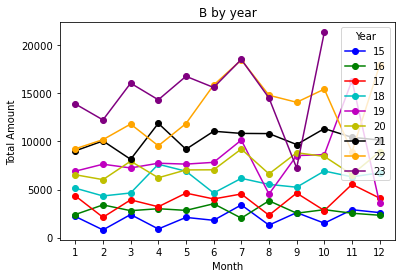

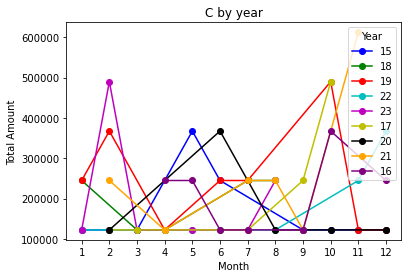

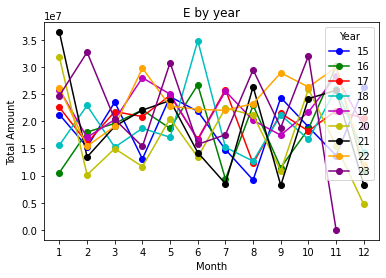

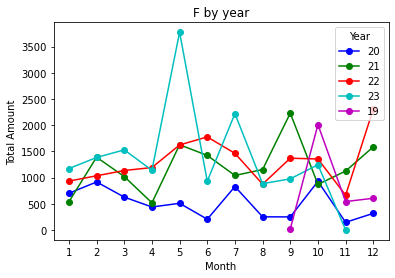

In [12]:
for letter, dataset in df_by_letter.items():

    grouped_df = dataset.groupby(['month', 'year'])['total_units'].sum().reset_index()
    
    grouped_df['month'] = pd.to_numeric(grouped_df['month'])
    grouped_df = grouped_df.sort_values(['month'])
    # Plot the data
    python_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']
    # Connect the dots
    for year, color in zip(grouped_df['year'].unique(), python_colors):
        year_data = grouped_df[grouped_df['year'] == year]
        plt.plot(year_data['month'], year_data['total_units'], marker='o', linestyle='-', color=color, label=str(year))


    plt.title(f'{letter} by year')
    plt.xlabel('Month')
    plt.ylabel('Total Amount')
    plt.legend(title='Year', loc='upper right')
    plt.xticks(range(1, 13))
    plt.show()


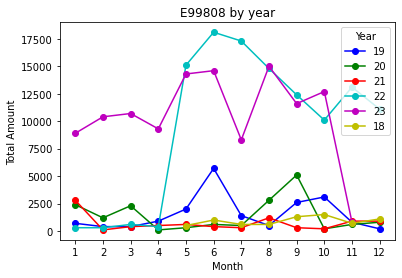

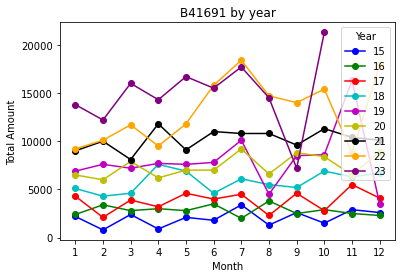

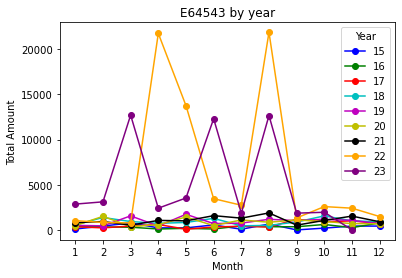

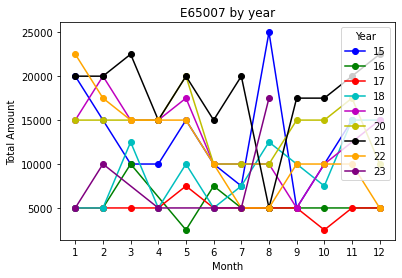

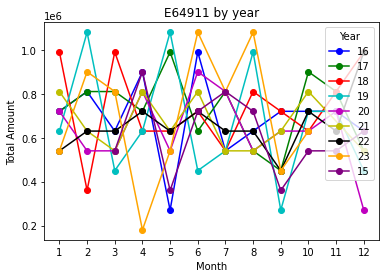

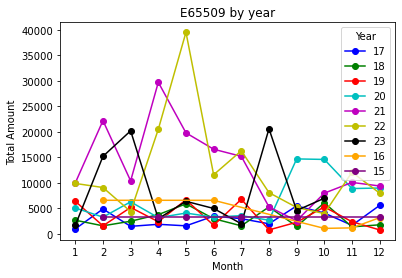

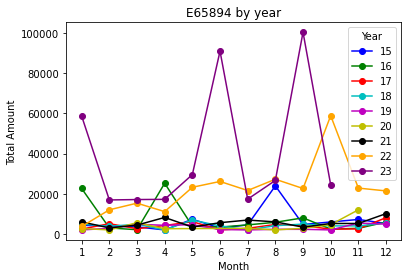

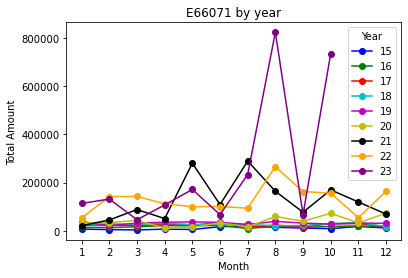

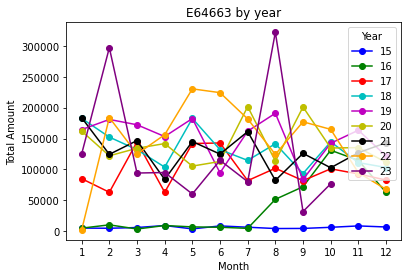

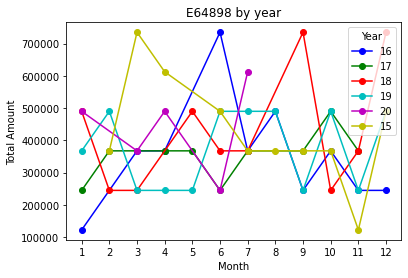

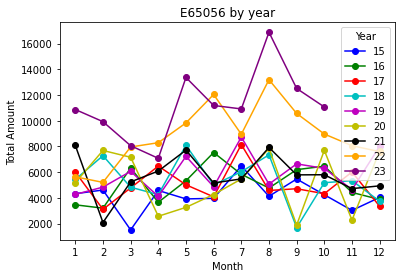

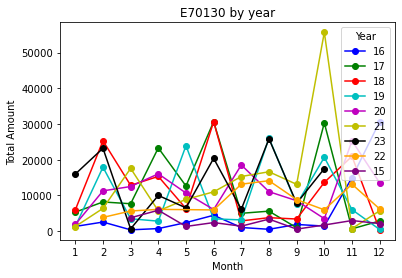

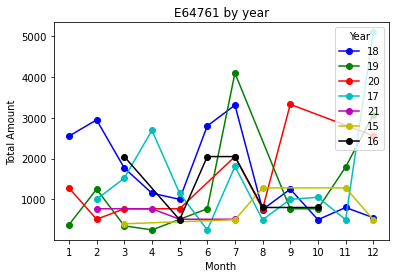

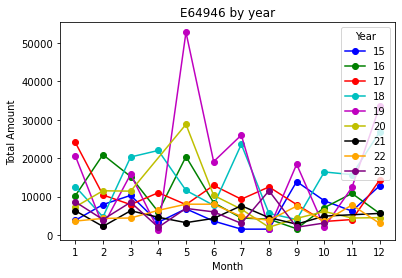

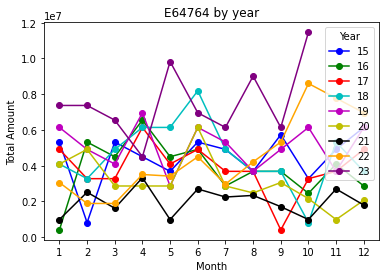

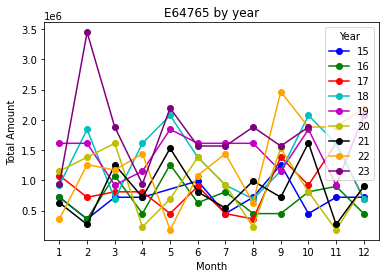

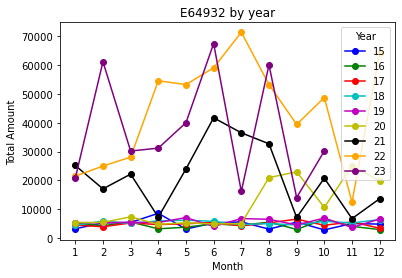

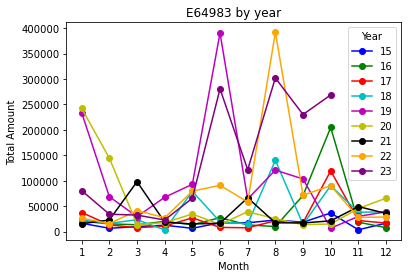

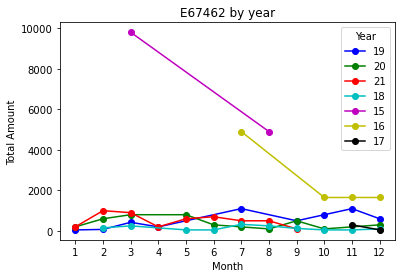

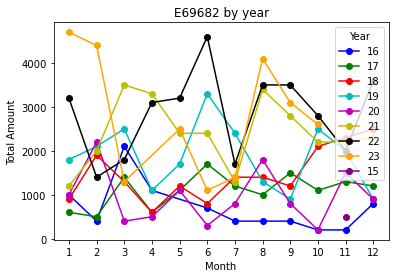

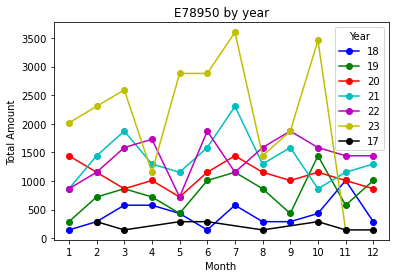

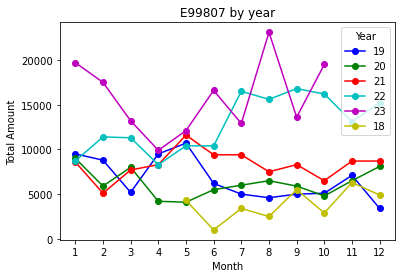

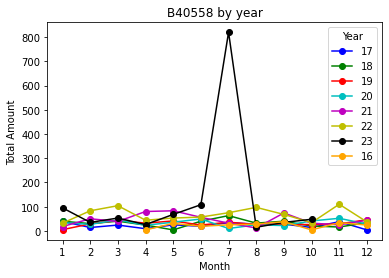

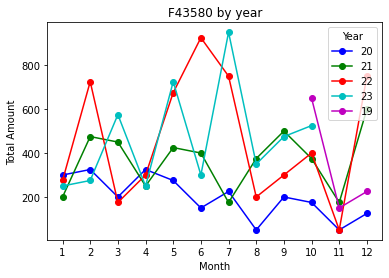

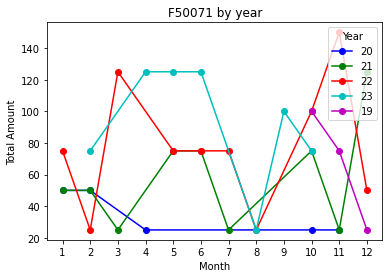

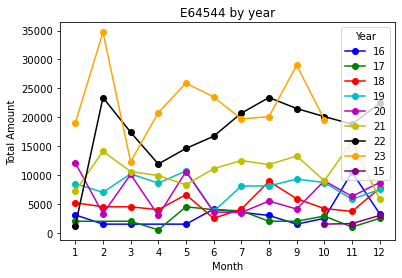

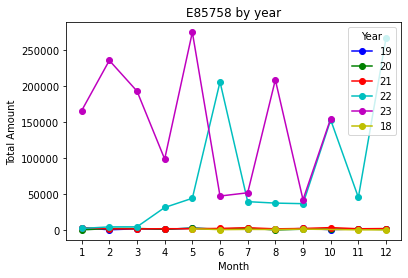

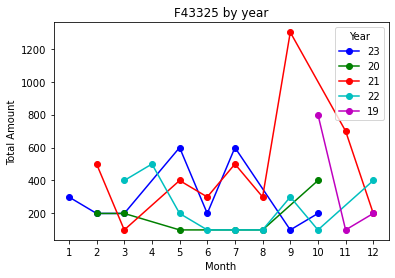

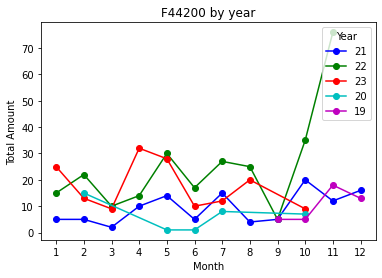

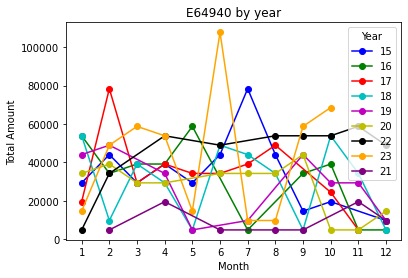

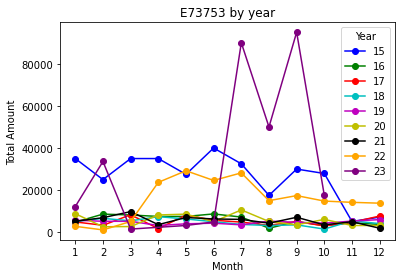

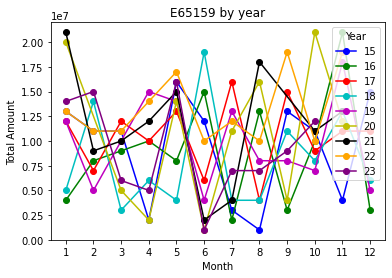

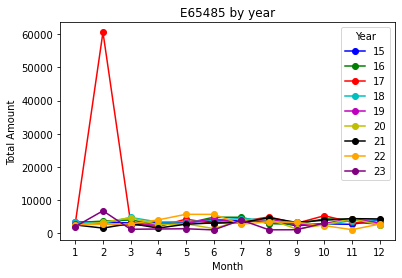

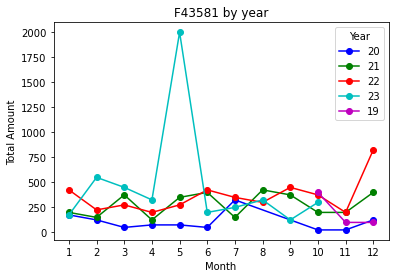

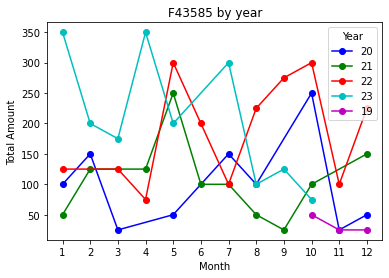

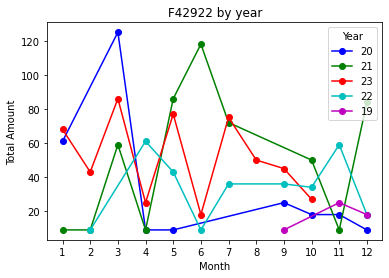

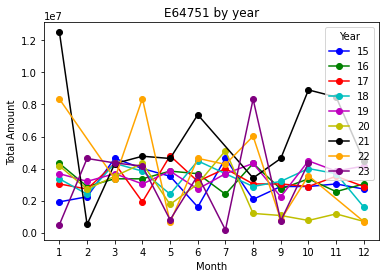

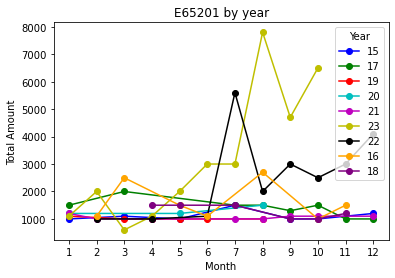

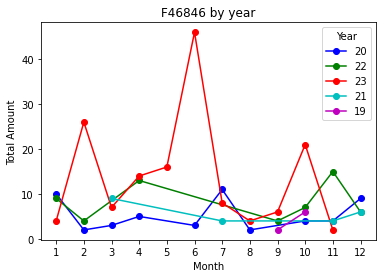

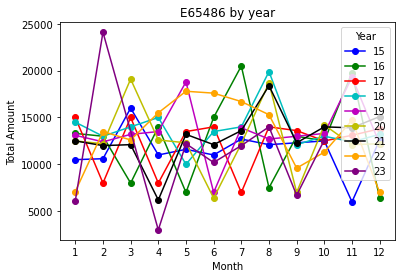

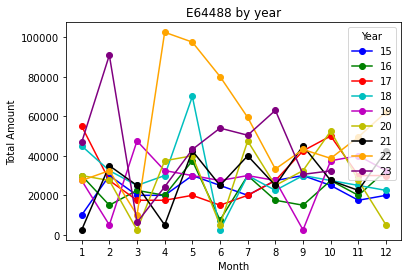

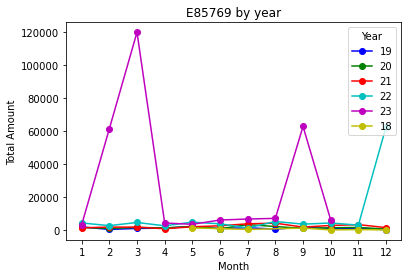

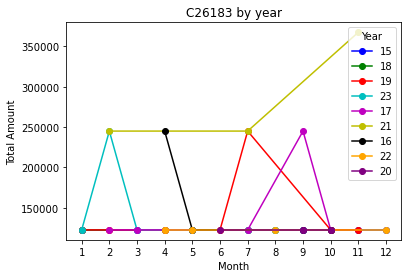

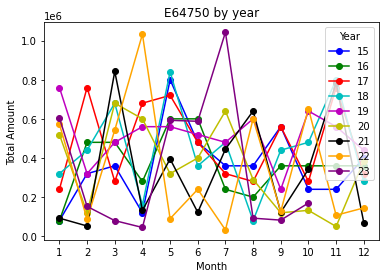

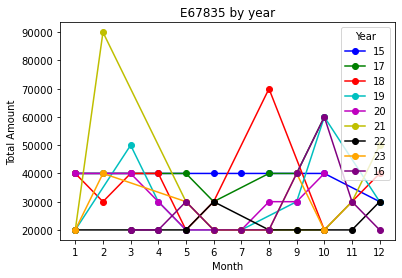

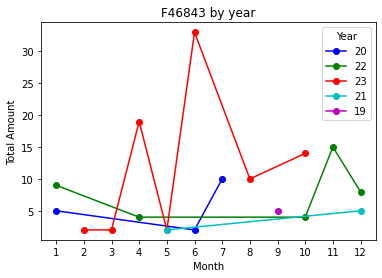

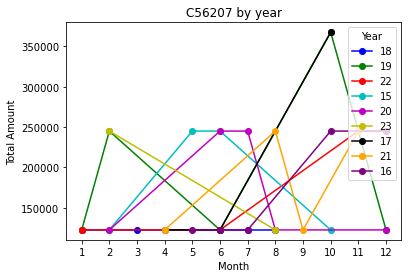

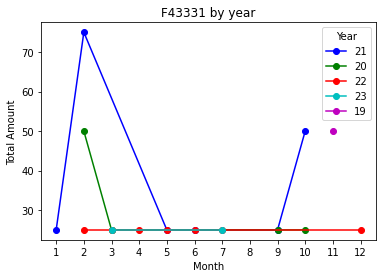

In [13]:
for p in codis:
    dataset = df.loc[df['CODIGO'] == p]

    grouped_df = dataset.groupby(['month', 'year'])['total_units'].sum().reset_index()
    
    grouped_df['month'] = pd.to_numeric(grouped_df['month'])
    grouped_df = grouped_df.sort_values(['month'])
    
    # Plot the data
    python_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']
    # Connect the dots
    for year, color in zip(grouped_df['year'].unique(), python_colors):
        year_data = grouped_df[grouped_df['year'] == year]
        plt.plot(year_data['month'], year_data['total_units'], marker='o', linestyle='-', color=color, label=str(year))


    plt.title(f'{p} by year')
    plt.xlabel('Month')
    plt.ylabel('Total Amount')
    plt.legend(title='Year', loc='upper right')
    plt.xticks(range(1, 13))
    plt.show()


# Càlcul de la caducitat

In [14]:
# Filter rows where 'TGL' is 'ALMACENABLE'
almacenable_df = df[df['TGL'] == 'ALMACENABLE']

# Get products that are only associated with 'ALMACENABLE'
products_almacenable_only = almacenable_df[~almacenable_df['CODIGO'].isin(df[df['TGL'] == 'TRANSITO']['PRODUCTO'])]['CODIGO'].unique()

# Print the result
print(products_almacenable_only)

['B41691' 'E65007' 'E64911' 'E65509' 'E65894' 'E66071' 'E64663' 'E65056'
 'E70130' 'E64946' 'E64764' 'E64765' 'E64932' 'E64983' 'E69682' 'E99807'
 'E64544' 'E85758' 'E64940' 'E73753' 'E65159' 'E65485' 'E64751' 'E65201'
 'E65486' 'E64488' 'E85769' 'C26183' 'E64750' 'E67835' 'C56207']


In [15]:
# Filter rows where 'TGL' is 'TRANSITO'
transito_df = df[df['TGL'] == 'TRANSITO']

# Get products that are only associated with 'TRANSITO'
products_transito_only = transito_df[~transito_df['CODIGO'].isin(df[df['TGL'] == 'ALMACENABLE']['PRODUCTO'])]['CODIGO'].unique()

# Print the result
print(products_transito_only)

['E99808' 'E64543' 'E64898' 'E64761' 'E78950' 'B40558' 'F43580' 'F50071'
 'F43325' 'F44200' 'F43581' 'F43585' 'F42922' 'F46846' 'F46843' 'F43331']


In [16]:
# Convert lists to sets and check if there are common elements
common_elements = set(products_transito_only).intersection(set(products_almacenable_only))

# Check if there are common elements
if common_elements:
    print(f"There are common elements: {common_elements}")
else:
    print("There are no common elements.")

There are no common elements.


In [17]:
# Get the unique elements by its CODIGO
unique_codigos = df['CODIGO'].unique()
print(len(unique_codigos))

48


In [18]:
# Convert 'FECHAPEDIDO' to datetime
df['FECHAPEDIDO'] = pd.to_datetime(df['FECHAPEDIDO'], format='%d/%m/%y')

# Sort DataFrame by 'CODIGO' and 'FECHAPEDIDO'
df.sort_values(['CODIGO', 'FECHAPEDIDO'], inplace=True)

# Calculate the difference in days between consecutive 'FECHAPEDIDO' for each 'CODIGO'
df['DaysBetweenOrders'] = df.groupby('CODIGO')['FECHAPEDIDO'].diff().dt.days

# Calculate the average number of days between orders for each 'CODIGO'
caducidad_estimada = df.groupby('CODIGO')['DaysBetweenOrders'].mean().reset_index(name='CaducidadAllHospitals')

# Print the result
print(caducidad_estimada)

    CODIGO  CaducidadAllHospitals
0   B40558               5.246654
1   B41691               3.489177
2   C26183              64.224490
3   C56207              71.813953
4   E64488              10.632450
5   E64543               3.482124
6   E64544               7.045673
7   E64663               4.255291
8   E64750               9.411765
9   E64751               6.346457
10  E64761              18.365079
11  E64764               7.793689
12  E64765              11.131488
13  E64898              18.339450
14  E64911               7.323256
15  E64932               5.476923
16  E64940              21.722973
17  E64946               8.270619
18  E64983               5.380872
19  E65007              13.647826
20  E65056               5.088748
21  E65159              11.881481
22  E65201              39.530864
23  E65485              10.193651
24  E65486              13.242798
25  E65509              10.331169
26  E65894              12.350000
27  E66071               3.594203
28  E67462    

In [19]:
# Sort DataFrame by 'id_hospital', 'CODIGO', and 'FECHAPEDIDO'
df.sort_values(['id_hospital', 'CODIGO', 'FECHAPEDIDO'], inplace=True)

# Calculate the difference in days between consecutive 'FECHAPEDIDO' for each 'id_hospital' and 'CODIGO'
df['DaysBetweenOrdersPerHospital'] = df.groupby(['id_hospital', 'CODIGO'])['FECHAPEDIDO'].diff().dt.days

# Calculate the mean of 'DaysBetweenOrders' for each 'CODIGO' and each 'id_hospital'
average_days_per_order_per_hospital = df.groupby(['id_hospital', 'CODIGO'])['DaysBetweenOrdersPerHospital'].mean().reset_index(name='AverageDaysPerOrderPerHospital')

# Print the result
print(average_days_per_order_per_hospital)

    id_hospital  CODIGO  AverageDaysPerOrderPerHospital
0             0  B41691                       19.827160
1             0  C26183                      634.333333
2             0  C56207                      459.333333
3             0  E64488                       28.196429
4             0  E64544                       21.475806
..          ...     ...                             ...
306           9  F43580                       16.000000
307           9  F44200                      107.833333
308           9  F46843                       35.000000
309           9  F46846                             NaN
310           9  F50071                      127.200000

[311 rows x 3 columns]


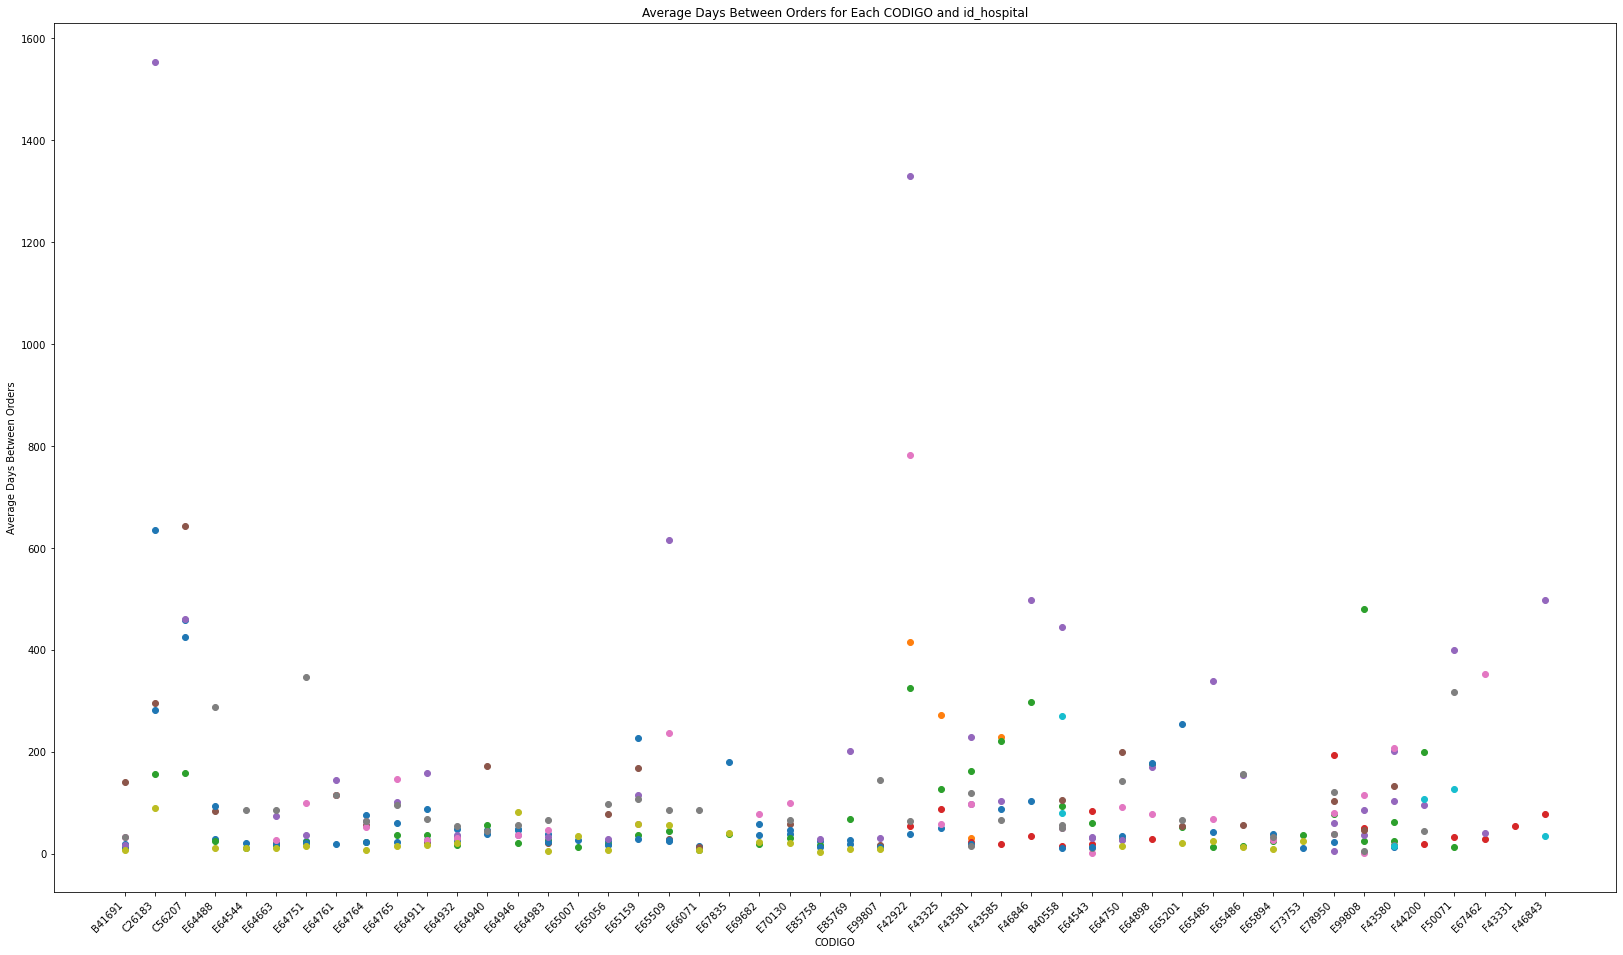

In [20]:
fig = plt.figure(figsize=(28,16))
ax = fig.add_subplot(111)
for id_hospital in average_days_per_order_per_hospital.id_hospital.unique():
    ax.scatter(average_days_per_order_per_hospital[average_days_per_order_per_hospital.id_hospital == id_hospital].CODIGO, 
               average_days_per_order_per_hospital[average_days_per_order_per_hospital.id_hospital == id_hospital].AverageDaysPerOrderPerHospital, label=id_hospital)

plt.xticks(range(48), rotation=45, ha='right') 
plt.title('Average Days Between Orders for Each CODIGO and id_hospital')
plt.xlabel('CODIGO')
plt.ylabel('Average Days Between Orders')
plt.show()

In [21]:
# Caducitat per cada departament de cada hospital
# Sort DataFrame by 'id_hospital', 'id_department', 'CODIGO', and 'FECHAPEDIDO'
df.sort_values(['id_hospital', 'id_department', 'CODIGO', 'FECHAPEDIDO'], inplace=True)

# Calculate the difference in days between consecutive 'FECHAPEDIDO' for each 'id_hospital' and 'CODIGO'
df['DaysBetweenOrdersPerHospitalPerDepartment'] = df.groupby(['id_hospital', 'id_department', 'CODIGO'])['FECHAPEDIDO'].diff().dt.days

# Calculate the mean of 'DaysBetweenOrders' for each 'CODIGO' and each 'id_hospital'
average_days_per_order_per_hospital_per_department = df.groupby(['id_hospital', 'id_department', 'CODIGO'])['DaysBetweenOrdersPerHospitalPerDepartment'].mean().reset_index(name='AverageDaysPerOrderPerHospitalPerDepartment')

# Print the result
print(average_days_per_order_per_hospital_per_department)

    id_hospital id_department  CODIGO  \
0             0            13  E64761   
1             0            18  E64761   
2             0             2  B41691   
3             0             2  C26183   
4             0             2  C56207   
..          ...           ...     ...   
599           9            74  F43580   
600           9            74  F44200   
601           9            74  F46843   
602           9            74  F46846   
603           9            74  F50071   

     AverageDaysPerOrderPerHospitalPerDepartment  
0                                      36.708333  
1                                      95.000000  
2                                      19.827160  
3                                     634.333333  
4                                     459.333333  
..                                           ...  
599                                    16.000000  
600                                   107.833333  
601                                    35.000000

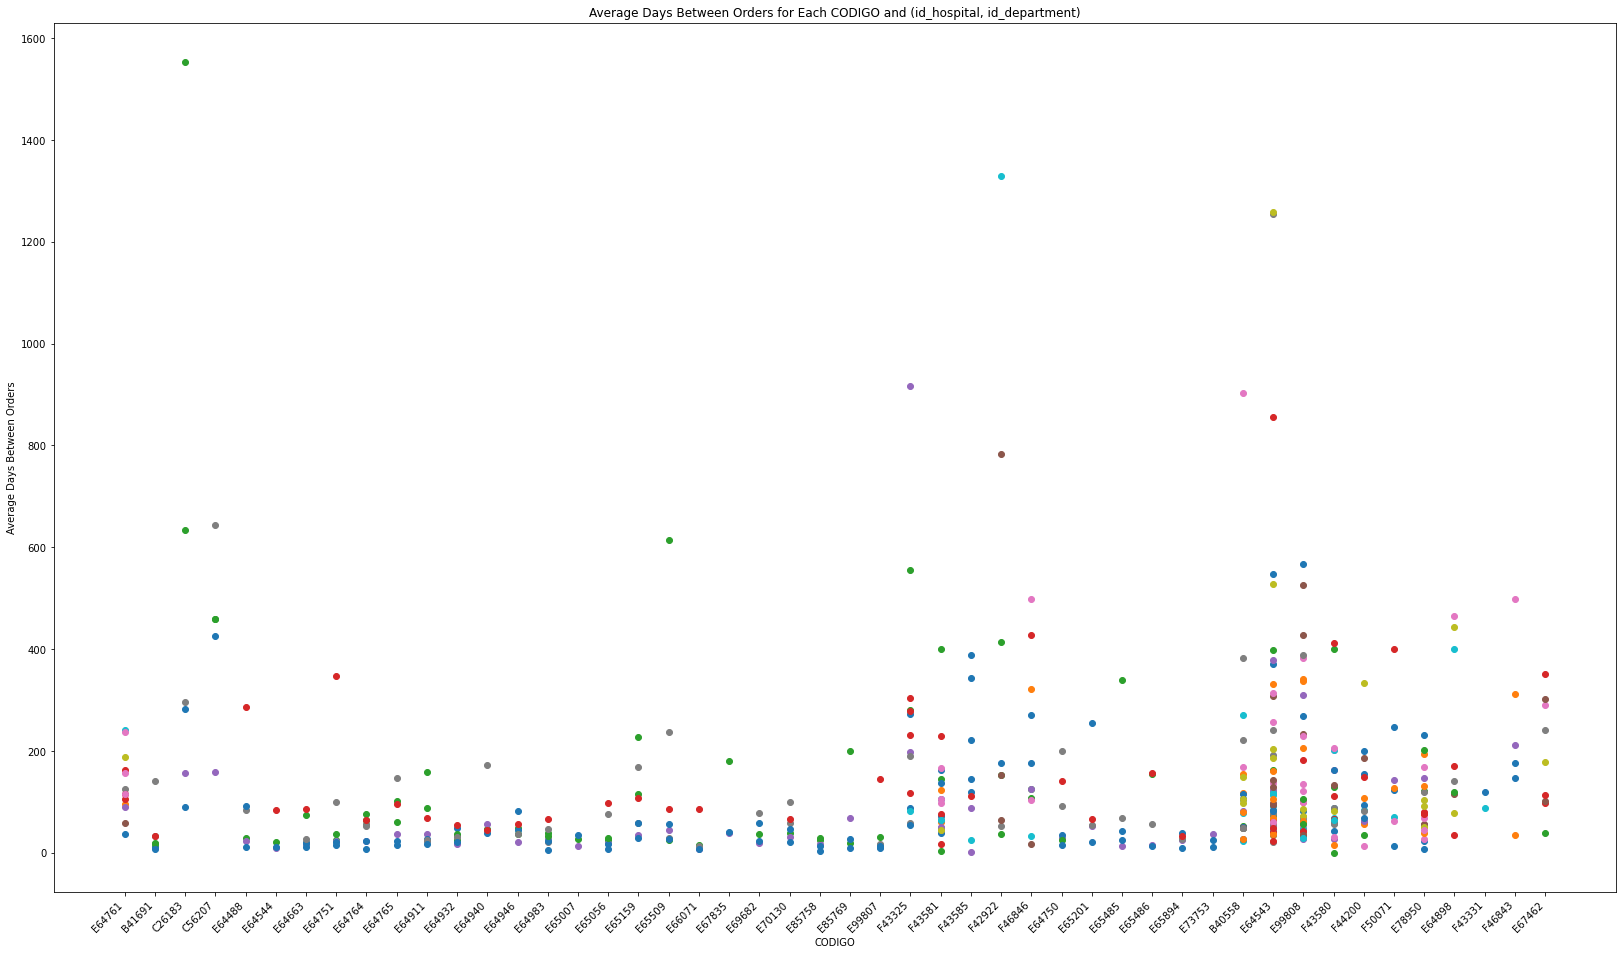

In [22]:
# Plot for each unique combination of 'id_hospital' and 'id_department'
fig = plt.figure(figsize=(28, 16))
ax = fig.add_subplot(111)

for (id_hospital, id_department) in average_days_per_order_per_hospital_per_department[['id_hospital', 'id_department']].drop_duplicates().itertuples(index=False):
    subset = average_days_per_order_per_hospital_per_department[(average_days_per_order_per_hospital_per_department['id_hospital'] == id_hospital) &
                                                                 (average_days_per_order_per_hospital_per_department['id_department'] == id_department)]
    ax.scatter(subset['CODIGO'], subset['AverageDaysPerOrderPerHospitalPerDepartment'], label=f'id_hospital {id_hospital}, id_department {id_department}')

plt.xticks(range(48), rotation=45, ha='right') 
plt.title('Average Days Between Orders for Each CODIGO and (id_hospital, id_department)')
plt.xlabel('CODIGO')
plt.ylabel('Average Days Between Orders')
plt.show()

In [23]:
# Assuming df is your original DataFrame and average_days_per_order_per_hospital_per_department is the DataFrame with AverageDaysPerOrderPerHospitalPerDepartment
exported_df = pd.merge(df, average_days_per_order_per_hospital_per_department, on=['id_hospital', 'id_department', 'CODIGO'], how='left')

# Rename the column for clarity
exported_df.rename(columns={'AverageDaysPerOrderPerHospitalPerDepartment': 'Caducidad'}, inplace=True)

# Print the result
print(exported_df)

       CODIGO FECHAPEDIDO      NUMERO REFERENCIA  CANTIDADCOMPRA  \
0      E64761  2017-02-02    91013/17   265868.4              50   
1      E64761  2017-03-01   162355/17   265868.4              50   
2      E64761  2017-03-27   230247/17   265868.4              50   
3      E64761  2017-04-21   300850/17   265868.4              50   
4      E64761  2017-05-02   325670/17   265868.4              50   
...       ...         ...         ...        ...             ...   
15693  F50071  2022-03-30   383234/22     421554               5   
15694  F50071  2022-05-25   632801/22     421554               5   
15695  F50071  2022-11-10  1371643/22     421554               5   
15696  F50071  2022-12-20  1561257/22     421554               5   
15697  F50071  2023-08-01   939687/23     421554               5   

       UNIDADESCONSUMOCONTENIDAS   PRECIO  IMPORTELINEA    TIPOCOMPRA  ORIGEN  \
0                              5   13.497        134.97  Compra menor  0-0-13   
1                    

In [24]:
# Assuming df is your DataFrame
exported_df.to_csv('processed_df.csv', index=False)